# Tarea - Caminata aleatoria

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

In [140]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


# Parámetros
delta_t = 0.001 
T = 10  
num_pasos  = int(T / delta_t) 

x = np.zeros(num_pasos)
y = np.zeros(num_pasos)
z = np.zeros(num_pasos)


for i in range(1, num_pasos):
    dx = np.random.choice([-1, 1]) * np.sqrt(delta_t)
    dy = np.random.choice([-1, 1]) * np.sqrt(delta_t)
    dz = np.random.choice([-1, 1]) * np.sqrt(delta_t)
    
    x[i] = x[i - 1] + dx
    y[i] = y[i - 1] + dy
    z[i] = z[i - 1] + dz

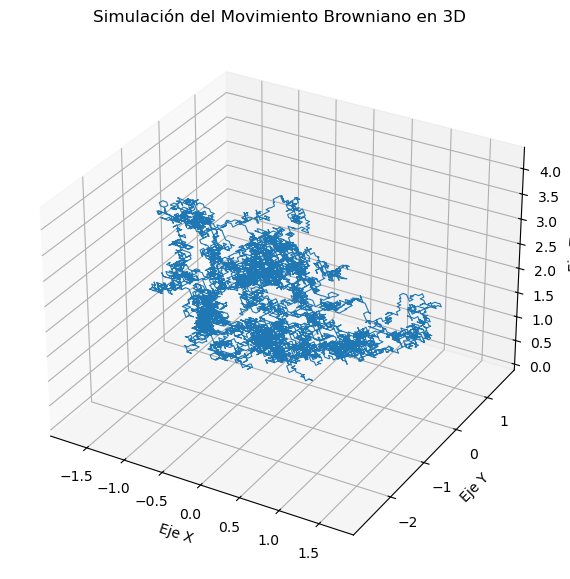

In [142]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.8)
ax.set_title("Simulación del Movimiento Browniano en 3D")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
ax.set_zlabel("Eje Z")

plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

#### 1-.

In [113]:
import numpy as np
import matplotlib.pyplot as plt

capital_inicial = 20  
capi = [capital_inicial] 

while capi[-1] > 0:
    C = capi[-1]
    
   
    if C >= 6:
        A = C / 2
    else:
        A = 2

    V = np.random.choice([1, -1])
    
    C_mas_1 = C + V * A
    capi.append(max(C_mas_1, 0))  

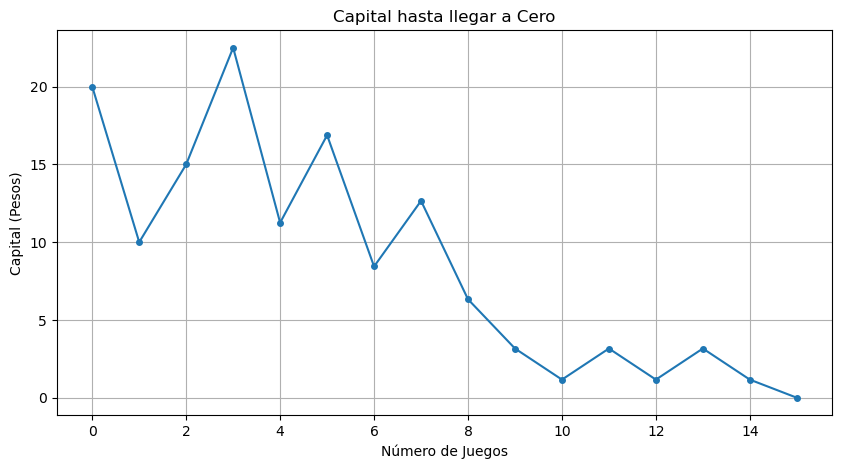

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(capital, marker='o', linestyle='-', markersize=4)
plt.title( "Capital hasta llegar a Cero")
plt.xlabel("Número de Juegos")
plt.ylabel("Capital (Pesos)")
plt.grid()
plt.show()

#### 2-.

In [149]:
import numpy as np
import matplotlib.pyplot as plt

n_apostadores = 10_000
resultados = [simular_jugador() for _ in range(n_apostadores)]

promedio_volados = np.mean(resultados)
promedio_volados 

26.5135

#### 3-.

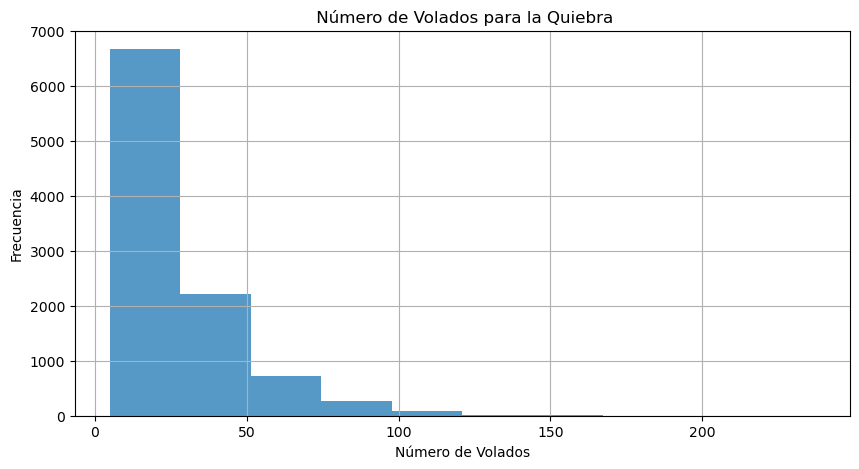

In [151]:
plt.figure(figsize=(10, 5))
plt.hist(resultados, alpha=0.75)
plt.title(" Número de Volados para la Quiebra")
plt.xlabel("Número de Volados")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()